In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('BR_mod.csv')

In [3]:
df.dtypes

patient.age_at_initial_pathologic_diagnosis                                int64
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision     float64
patient.axillary_lymph_node_stage_method_type                            float64
patient.breast_carcinoma_estrogen_receptor_status                        float64
patient.breast_carcinoma_progesterone_receptor_status                    float64
patient.breast_carcinoma_surgical_procedure_name                         float64
patient.gender                                                             int64
patient.histological_type                                                float64
patient.history_of_neoadjuvant_treatment                                 float64
patient.initial_pathologic_diagnosis_method                              float64
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status           float64
patient.lymph_node_examined_count                                        float64
patient.margin_status       

In [4]:
#checking if NaNs exist
columns = list(df)
print('Columns v/s  Has_Nans')
for column in columns:
  col = df[column]
  print(column+'----> '+ str(col.hasnans))

Columns v/s  Has_Nans
patient.age_at_initial_pathologic_diagnosis----> False
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision----> False
patient.axillary_lymph_node_stage_method_type----> True
patient.breast_carcinoma_estrogen_receptor_status----> True
patient.breast_carcinoma_progesterone_receptor_status----> True
patient.breast_carcinoma_surgical_procedure_name----> True
patient.gender----> False
patient.histological_type----> True
patient.history_of_neoadjuvant_treatment----> True
patient.initial_pathologic_diagnosis_method----> True
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status----> True
patient.lymph_node_examined_count----> True
patient.margin_status----> True
patient.menopause_status----> True
patient.number_of_lymphnodes_positive_by_he----> True
patient.other_dx----> True
patient.person_neoplasm_cancer_status----> True
patient.race_list.race----> True
patient.stage_event.pathologic_stage----> True
patient.stage_event.tnm_categories.pathologi

In [5]:
#Replace NaNs wirh mean
for column in columns:
  col = df[column]
  mean_val = col.mean()
  col.fillna(value=mean_val,inplace=True)
  df[column] = col

In [6]:
#Rechecking if NaNs exist
print('Columns v/s  Has_Nans')
for column in columns:
  col = df[column]
  print(column+'----> '+ str(col.hasnans))

Columns v/s  Has_Nans
patient.age_at_initial_pathologic_diagnosis----> False
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision----> False
patient.axillary_lymph_node_stage_method_type----> False
patient.breast_carcinoma_estrogen_receptor_status----> False
patient.breast_carcinoma_progesterone_receptor_status----> False
patient.breast_carcinoma_surgical_procedure_name----> False
patient.gender----> False
patient.histological_type----> False
patient.history_of_neoadjuvant_treatment----> False
patient.initial_pathologic_diagnosis_method----> False
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status----> False
patient.lymph_node_examined_count----> False
patient.margin_status----> False
patient.menopause_status----> False
patient.number_of_lymphnodes_positive_by_he----> False
patient.other_dx----> False
patient.person_neoplasm_cancer_status----> False
patient.race_list.race----> False
patient.stage_event.pathologic_stage----> False
patient.stage_event.tnm_cate

In [7]:
#checking range of each attribute
for column in columns:
  col = df[column]
  print(column+'  '+str(col.max())+' '+str(col.min()))

patient.age_at_initial_pathologic_diagnosis  90 26
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision  1.8 0.0
patient.axillary_lymph_node_stage_method_type  4.0 0.0
patient.breast_carcinoma_estrogen_receptor_status  1.0 0.0
patient.breast_carcinoma_progesterone_receptor_status  1.0 0.0
patient.breast_carcinoma_surgical_procedure_name  3.0 0.0
patient.gender  1 0
patient.histological_type  7.0 0.0
patient.history_of_neoadjuvant_treatment  1.0 0.0
patient.initial_pathologic_diagnosis_method  6.0 0.0
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status  1.0 0.0
patient.lymph_node_examined_count  44.0 0.0
patient.margin_status  2.0 0.0
patient.menopause_status  3.0 0.0
patient.number_of_lymphnodes_positive_by_he  35.0 0.0
patient.other_dx  1.0 0.0
patient.person_neoplasm_cancer_status  1.0 0.0
patient.race_list.race  3.0 0.0
patient.stage_event.pathologic_stage  12.0 1.0
patient.stage_event.tnm_categories.pathologic_categories.pathologic_m  3 0
patient.stage_ev

In [8]:
df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,1.750751,0.0,13.0,0.0,3.000000,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.000000,1.0,1.0,0.0,1,1.0,0.0,0.000000,1.0,15.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,2.104427,1.0,1.0,1.0,1,1.0,0.0,0.000000,0.0,23.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.000000,1.0,1.0,3.0,1,1.0,0.0,0.000000,1.0,2.0,2.0,2.121152,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,1.0,14.0,0.0,2.000000,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.000000,1.0,1.0,0.0,1,2.0,0.0,0.000000,0.0,4.0,0.0,2.000000,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,0.0,22.0,0.0,2.000000,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,2.104427,1.0,1.0,3.0,1,2.0,0.0,0.000000,0.0,11.0,0.0,2.000000,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.000000,1.0,1.0,2.0,1,2.0,0.0,0.000000,0.0,5.0,1.0,2.000000,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


In [9]:
#normalize the dataset
normalized_df=(df-df.min())/(df.max()-df.min())

In [10]:
normalized_df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,0.453125,0.222222,0.750000,1.0,1.0,0.333333,1.0,0.285714,0.0,0.291792,0.0,0.295455,0.0,1.000000,0.114286,0.0,1.0,0.666667,1.000000,0.666667,1.000000,1.000000,0.0,0.000000
1,0.375000,1.000000,0.750000,1.0,1.0,0.000000,1.0,0.142857,0.0,0.000000,1.0,0.340909,0.0,0.666667,0.028571,0.0,0.0,0.333333,0.454545,0.000000,0.333333,0.333333,0.0,0.000000
2,0.562500,0.555556,0.526107,1.0,1.0,0.333333,1.0,0.142857,0.0,0.000000,0.0,0.522727,0.0,0.666667,0.028571,0.0,0.0,0.333333,0.454545,0.000000,0.333333,0.333333,0.0,0.000000
3,0.406250,0.555556,1.000000,1.0,1.0,1.000000,1.0,0.142857,0.0,0.000000,1.0,0.045455,1.0,0.707051,0.000000,0.0,0.0,0.333333,0.090909,0.000000,0.133333,0.250000,0.0,0.000000
4,0.375000,0.000000,0.000000,1.0,1.0,0.333333,1.0,0.285714,0.0,0.000000,1.0,0.318182,0.0,0.666667,0.114286,0.0,0.0,0.666667,0.636364,0.000000,0.666667,0.333333,1.0,0.025641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,0.796875,0.000000,0.250000,1.0,1.0,0.000000,1.0,0.285714,0.0,0.000000,0.0,0.090909,0.0,0.666667,0.000000,0.0,0.0,0.666667,0.090909,0.666667,0.066667,0.250000,0.0,0.948718
1093,0.312500,0.777778,0.750000,1.0,1.0,0.333333,1.0,0.285714,0.0,0.000000,0.0,0.500000,0.0,0.666667,0.142857,0.0,0.0,0.666667,0.636364,0.666667,0.666667,0.250000,0.0,0.974359
1094,0.656250,0.444444,0.526107,1.0,1.0,1.000000,1.0,0.285714,0.0,0.000000,0.0,0.250000,0.0,0.666667,0.000000,0.0,0.0,0.666667,0.454545,0.666667,0.000000,0.583333,0.0,0.974359
1095,0.546875,0.444444,0.750000,1.0,1.0,0.666667,1.0,0.285714,0.0,0.000000,0.0,0.113636,0.5,0.666667,0.085714,1.0,0.0,0.666667,0.636364,0.666667,0.333333,0.583333,0.0,1.000000


In [11]:
numRows = normalized_df.count()
numRows = numRows[0]

In [12]:
numColums = len(list(normalized_df.iloc[0]))

In [13]:
colNames = list(normalized_df.columns)

In [14]:
def Euclidean_Dist(df1, df2):
    return np.linalg.norm(df1[colNames].values - df2[colNames].values,
                   axis=0)

In [15]:
def Total_Cost(k,cluster):
  dist = 0
  for j in range(0,k):
    for point in cluster[j]:
      dist = dist+Euclidean_Dist(point, randomPoints.iloc[j])
  return dist

In [16]:
def KMedoid(randomPoints,normalized_df,k):
  
  distance =[]
  cluster = {}
  for i in range(0,numRows):
    distance.append(1000)
  for i in range(0,k):
    cluster[i] =[]
  
  for i in range(0,numRows):
    minDist =100000
    clusterNumber = -1
    for j in range(0,k):
      dist = Euclidean_Dist(normalized_df.iloc[i], randomPoints.iloc[j]) #if distance to a given cluster is less, update cluster number for that point
      if dist < minDist:
        minDist = dist
        clusterNumber = j
    cluster[clusterNumber].append(normalized_df.iloc[i])

  return cluster

In [17]:
#Run K medoid for k = 2 to 10
import random
x=[]
y=[]
k=2
finalDictionary = {}
for i in range (2,11):
  finalDictionary[i]={}
for k in range(2,11):
  randomPoints = normalized_df.sample(n = k)
  totalCost = 1000
  newtotalCost = 0
  cluster = {}
  clusterNew= {}
  runNumber = 0
  #Compare if cost using new medoid is less than original cost
  while(newtotalCost < totalCost):
    cluster = KMedoid(randomPoints, normalized_df,k)
    totalCost = Total_Cost(k,cluster)

    #randomly chosing another point
    newRandomPoint = random.choice(cluster[runNumber % k]) 
    randomPoints.iloc[0] = newRandomPoint

    clusterNew = KMedoid(randomPoints, normalized_df,k)
    newtotalCost = Total_Cost(k,clusterNew)
    runNumber = runNumber + 1

  #Print the output  
  print('K =' + str(k))
  for i in range(0,k):
    size = len(cluster[i])
    print('Cluster number '+ str(i) + ', Total points:' + str(size))

  #store values for using in elbow method
  x.append(k)
  y.append(totalCost)
  finalDictionary[k] = cluster


K =2
Cluster number 0, Total points:392
Cluster number 1, Total points:705
K =3
Cluster number 0, Total points:160
Cluster number 1, Total points:603
Cluster number 2, Total points:334
K =4
Cluster number 0, Total points:297
Cluster number 1, Total points:439
Cluster number 2, Total points:147
Cluster number 3, Total points:214
K =5
Cluster number 0, Total points:198
Cluster number 1, Total points:240
Cluster number 2, Total points:198
Cluster number 3, Total points:200
Cluster number 4, Total points:261
K =6
Cluster number 0, Total points:224
Cluster number 1, Total points:161
Cluster number 2, Total points:12
Cluster number 3, Total points:235
Cluster number 4, Total points:100
Cluster number 5, Total points:365
K =7
Cluster number 0, Total points:273
Cluster number 1, Total points:177
Cluster number 2, Total points:37
Cluster number 3, Total points:102
Cluster number 4, Total points:27
Cluster number 5, Total points:451
Cluster number 6, Total points:30
K =8
Cluster number 0, Total 

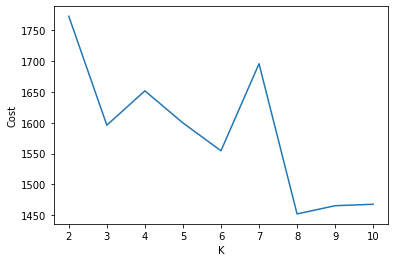

In [18]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

In [19]:
#Running KMedoid for k=8 because that is the most optimal value at the time of coding this
x=[]
y=[]
k=8
finalDictionary = {}
for i in range (2,11):
  finalDictionary[i]={}

randomPoints = normalized_df.sample(n = k)
totalCost = 1000
newtotalCost = 0
cluster = {}
clusterNew= {}
runNumber = 0
#Compare if cost using new medoid is less than original cost
while(newtotalCost < totalCost):
  cluster = KMedoid(randomPoints, normalized_df,k)
  totalCost = Total_Cost(k,cluster)

  #randomly chosing another point
  newRandomPoint = random.choice(cluster[runNumber % k]) 
  randomPoints.iloc[0] = newRandomPoint

  clusterNew = KMedoid(randomPoints, normalized_df,k)
  newtotalCost = Total_Cost(k,clusterNew)
  runNumber = runNumber + 1

#Print the output  
print('K =' + str(k))
for i in range(0,k):
  size = len(cluster[i])
  print('Cluster number '+ str(i) + ', Total points:' + str(size))

K =8
Cluster number 0, Total points:146
Cluster number 1, Total points:238
Cluster number 2, Total points:70
Cluster number 3, Total points:159
Cluster number 4, Total points:258
Cluster number 5, Total points:24
Cluster number 6, Total points:19
Cluster number 7, Total points:183


In [23]:
print(cluster[1]) #Show points in cluster 1

[patient.age_at_initial_pathologic_diagnosis                              0.375000
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision     1.000000
patient.axillary_lymph_node_stage_method_type                            0.750000
patient.breast_carcinoma_estrogen_receptor_status                        1.000000
patient.breast_carcinoma_progesterone_receptor_status                    1.000000
patient.breast_carcinoma_surgical_procedure_name                         0.000000
patient.gender                                                           1.000000
patient.histological_type                                                0.142857
patient.history_of_neoadjuvant_treatment                                 0.000000
patient.initial_pathologic_diagnosis_method                              0.000000
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status           1.000000
patient.lymph_node_examined_count                                        0.340909
patient.margin_